In [52]:
# Compute the slopes for each condition 

import numpy as np
import matplotlib.pyplot as plt 
import sys
import time
import os 
from scipy.ndimage import gaussian_filter1d
from scipy.stats import zscore 

from mne.stats.cluster_level  import permutation_cluster_1samp_test 

sys.path.append('/media/olive/Research/utils/Python/')  
from file_utils import *
 
 
# Parameter settings
fs=20   
ts=1/fs   # sampling time
tt=np.arange(-1,5,ts)
trun=3
sig=3
wrap_around=5
slope_angles=[-180,-135,-90,-45,0]
  
Gaussian_smoothening_needed=False
time_resolved_tuning_desired=False
iteration_included=False
 
ROIs_hetero=['V1_45','V1_90','V1_135','PPC_45','PPC_90','PPC_135']

# Path settings for tuning curve data   
base_path='/media/olive/Research/oliver/decoding_revision/tuning_curves/' 
paradigm='task'
task_tc_path=os.path.join(base_path,paradigm)

paradigm='passive'
passive_tc_path=os.path.join(base_path,paradigm) 

In [53]:
def print_status(msg,kind='short',line=50): 
    if kind=='short':
        print('++ '+msg)
    else:
        print('++ '+line*'-')
        print('++ '+msg)
        print('++ '+line*'-')
        
def avg_across_zero_centered_tcs(data,shift): 
	print_status('Averaging equi-distant orientations')	 
	ns,nt,noc=data.shape
	unsmoothed_tc=np.zeros((shift,nt,noc)) 
  
	for p in range(noc): 
		unsmoothed_tc[:,:,p]=average_zero_centered_curves(data[:,:,p],shift) 

	return unsmoothed_tc 


def average_zero_centered_curves(A,p): 
	# input A is assumed to be 2D matrix
	# First dimension is number of stimulus

	B_left=np.zeros_like(A[:p,:])  # Allocate shape
	B_left=A[:p,:]					# slice upto the zero-centered value
	B_right=np.flip(A[p:,:],axis=0)   # flip the right tail of the tuning curve to the left side
	lr=B_right.shape[0] 
	B_left[(p-1-lr):(p-1),:]= (B_left[(p-1-lr):(p-1),:]+B_right)/2 # average the equi-distant stimulus orientation
	
	return B_left 


def esti_slope(angles,y,intercept=False,standardise=False):
 
	if isinstance(angles,list):
		angles=np.array(angles) 
		
	angles=zscore(angles)	
		
	if intercept:	
		# Design matrix
		X=np.column_stack((np.ones((len(angles),1)),angles)) 
	else:
		X=angles[:,np.newaxis] 
 
	idx =intercept*1
	
	# if zscore for y is needed
	if standardise:
		sha=y.shape
		if len(sha)==1:
			y=zscore(y)
		else:
			for k in range(sha[1]):
				y[:,k]=zscore(y[:,k])
	
	invW=np.linalg.pinv(X)
	return np.matmul(invW,y)[idx]  # return the slope coefficient

In [54]:
percent_data=[10,20,40,60,100] 

## For task condition

++ --------------------------------------------------
++ Computing slopes for  ROIV1_45 for the percentage  
++ --------------------------------------------------
++ No. of animals in V1_45 is 10


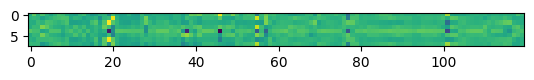

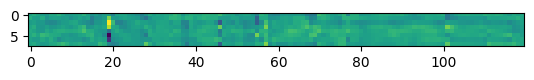

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


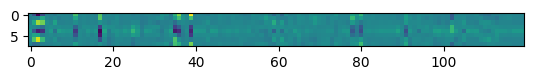

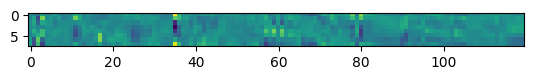

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


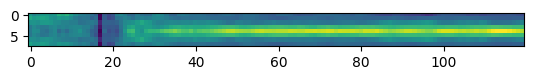

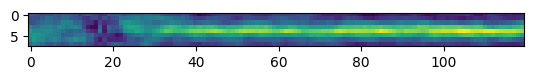

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


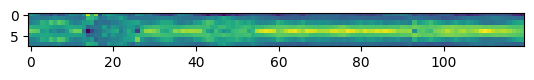

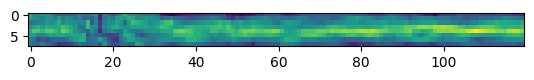

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


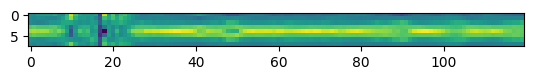

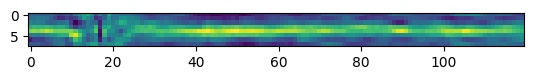

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


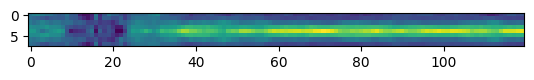

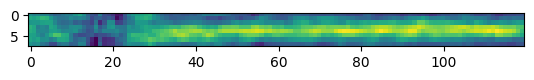

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


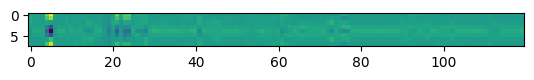

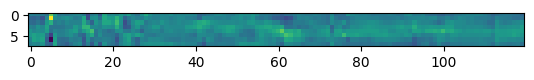

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


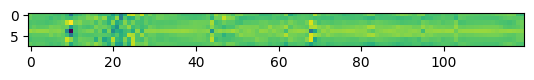

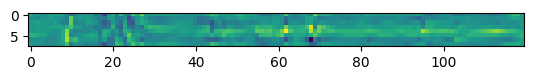

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


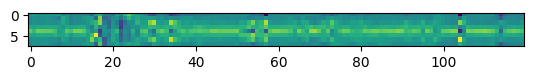

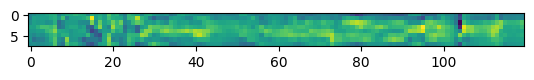

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


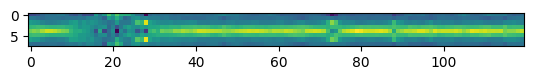

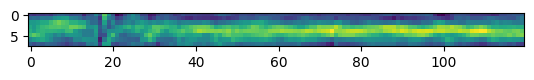

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..
The directory /media/olive/Research/oliver/decoding_revision/slopes/task/V1_45/10 is created!
++ --------------------------------------------------
++ Computing slopes for  ROIV1_45 for the percentage  
++ --------------------------------------------------
++ No. of animals in V1_45 is 10


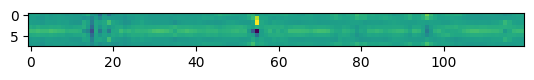

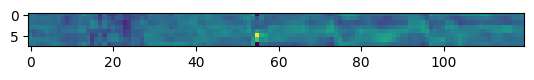

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


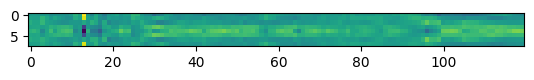

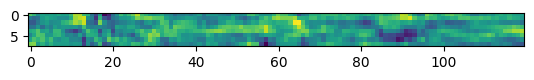

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


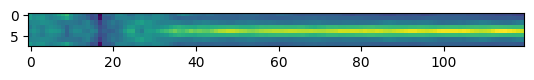

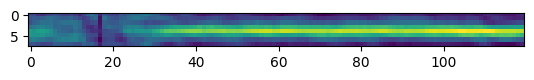

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


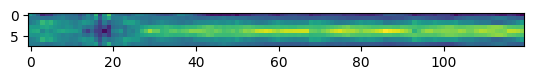

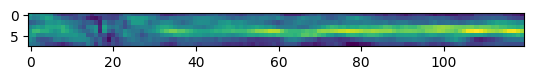

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


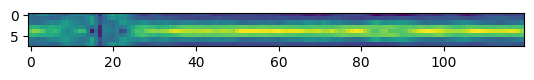

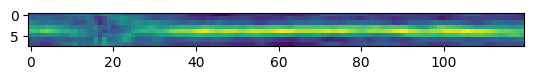

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


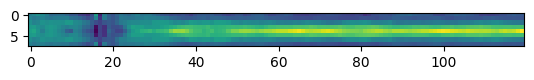

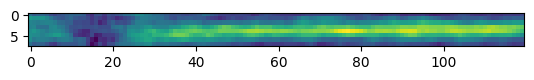

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


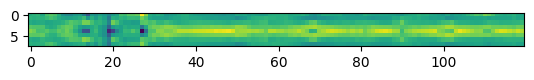

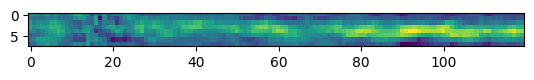

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


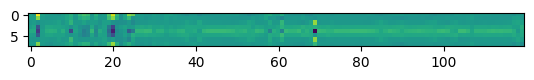

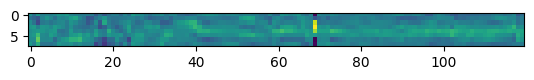

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


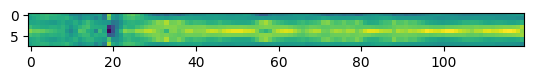

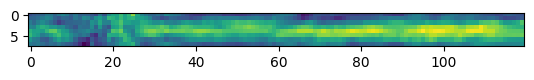

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


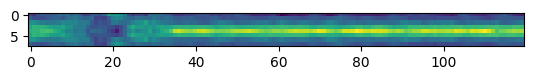

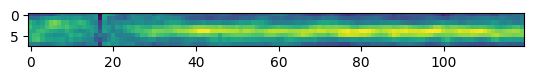

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..
The directory /media/olive/Research/oliver/decoding_revision/slopes/task/V1_45/20 is created!
++ --------------------------------------------------
++ Computing slopes for  ROIV1_45 for the percentage  
++ --------------------------------------------------
++ No. of animals in V1_45 is 10


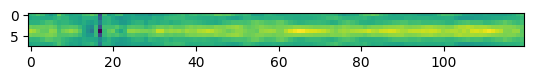

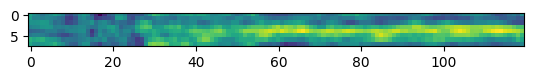

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


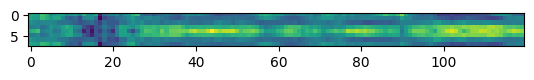

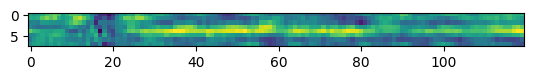

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


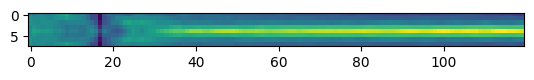

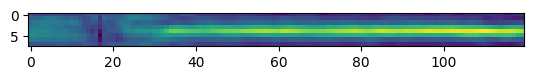

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


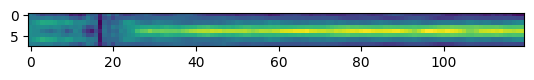

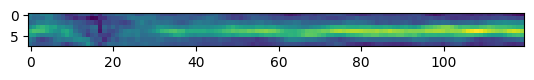

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


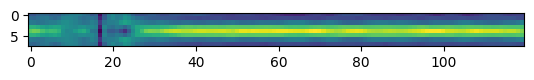

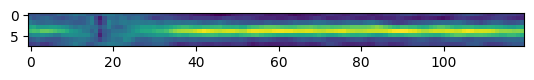

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


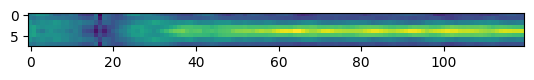

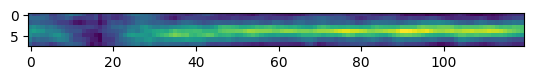

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


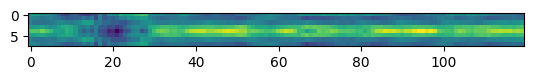

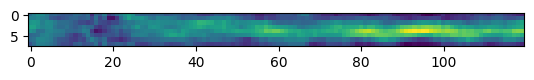

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


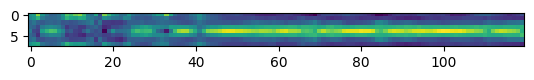

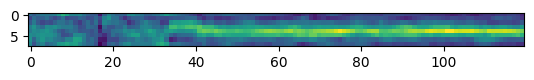

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


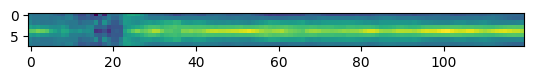

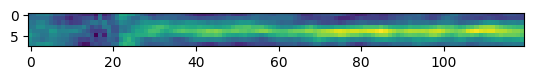

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


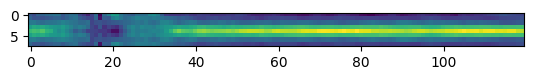

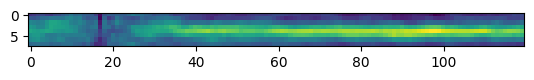

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..
The directory /media/olive/Research/oliver/decoding_revision/slopes/task/V1_45/40 is created!
++ --------------------------------------------------
++ Computing slopes for  ROIV1_45 for the percentage  
++ --------------------------------------------------
++ No. of animals in V1_45 is 10


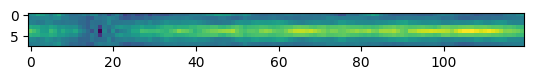

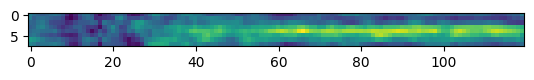

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


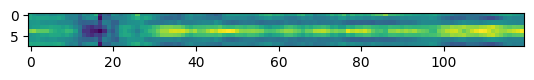

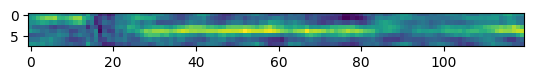

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


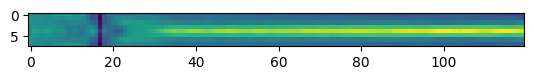

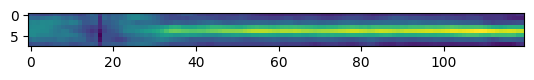

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


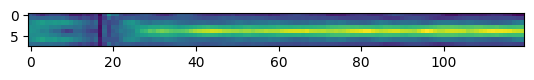

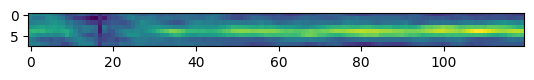

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


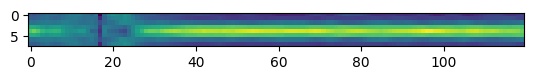

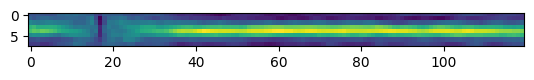

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


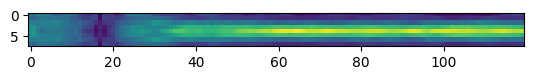

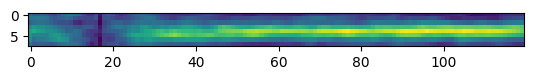

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


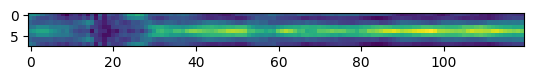

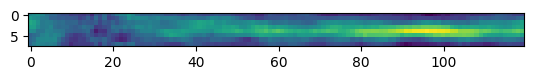

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


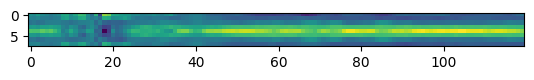

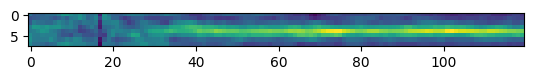

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


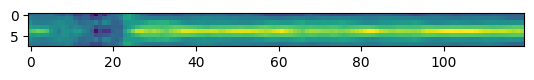

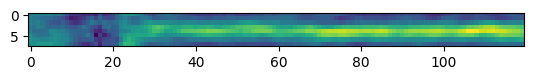

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


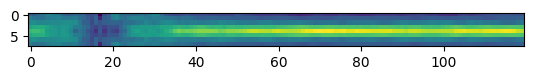

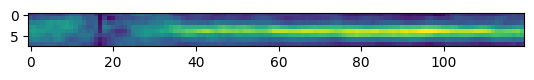

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..
The directory /media/olive/Research/oliver/decoding_revision/slopes/task/V1_45/60 is created!
++ --------------------------------------------------
++ Computing slopes for  ROIV1_45 for the percentage  
++ --------------------------------------------------
++ No. of animals in V1_45 is 10


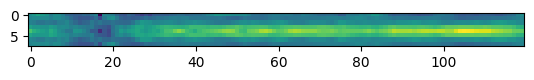

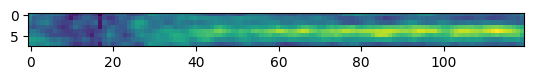

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


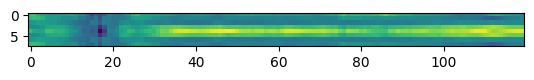

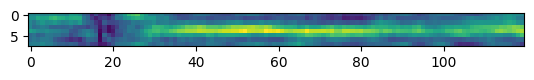

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


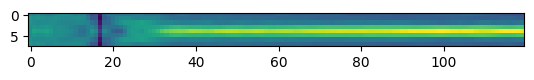

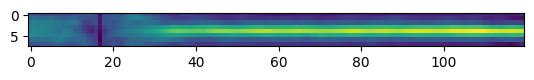

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


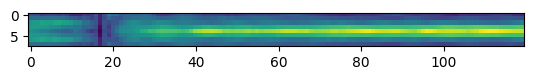

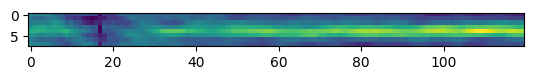

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


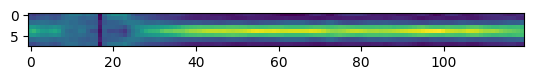

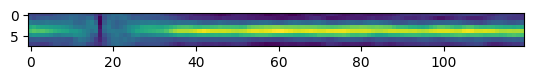

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


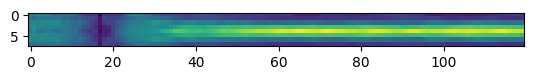

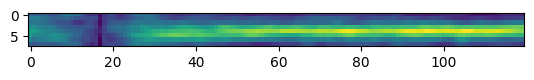

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


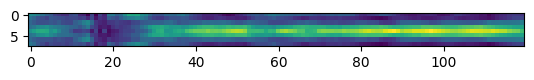

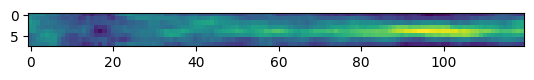

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


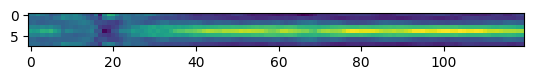

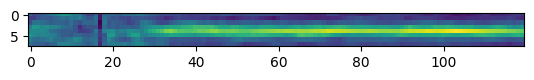

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


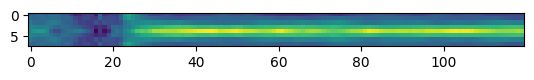

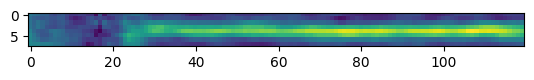

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


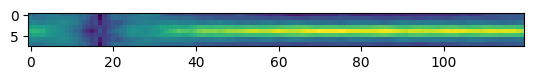

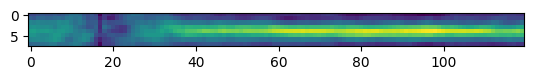

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..
The directory /media/olive/Research/oliver/decoding_revision/slopes/task/V1_45/100 is created!
++ --------------------------------------------------
++ Computing slopes for  ROIV1_90 for the percentage  
++ --------------------------------------------------
++ No. of animals in V1_90 is 10


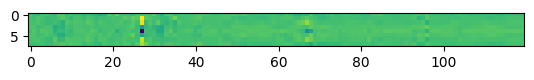

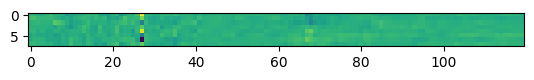

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


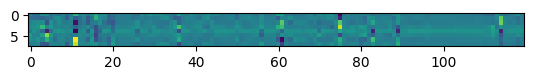

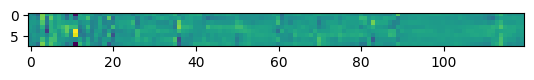

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


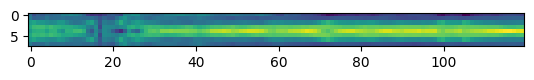

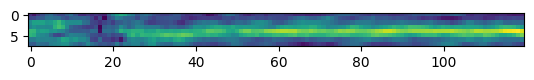

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


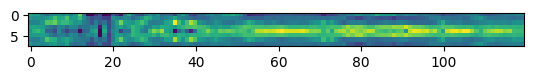

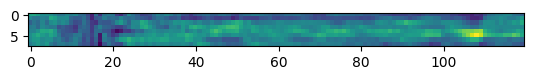

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


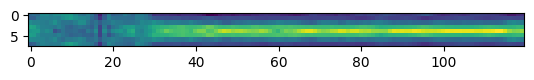

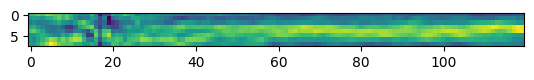

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


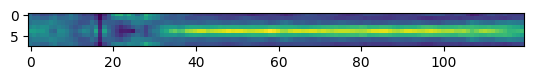

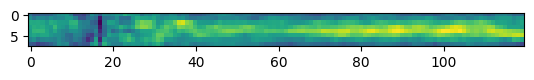

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


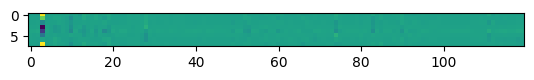

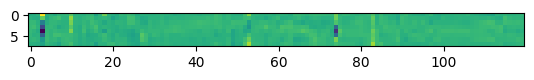

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


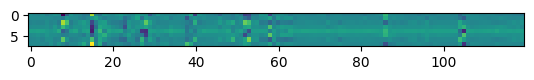

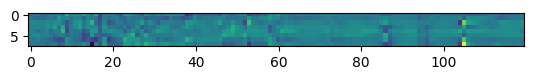

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


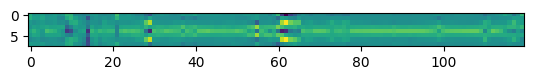

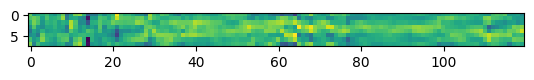

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


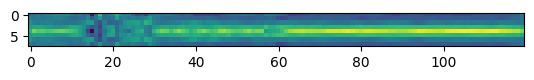

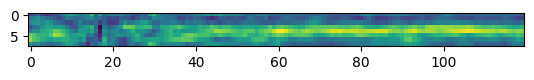

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..
The directory /media/olive/Research/oliver/decoding_revision/slopes/task/V1_90/10 is created!
++ --------------------------------------------------
++ Computing slopes for  ROIV1_90 for the percentage  
++ --------------------------------------------------
++ No. of animals in V1_90 is 10


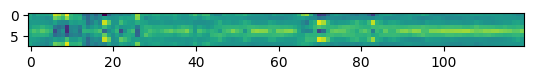

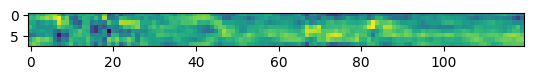

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


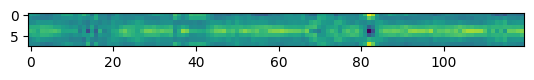

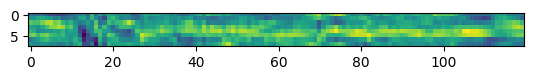

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


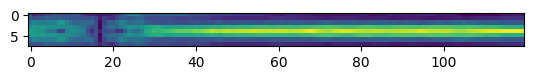

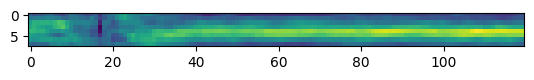

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


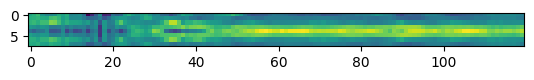

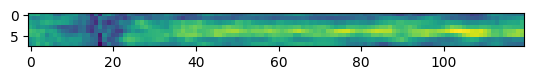

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


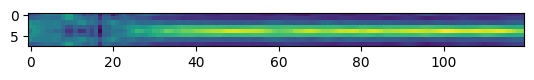

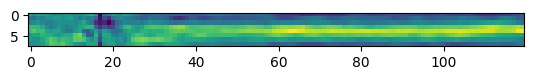

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


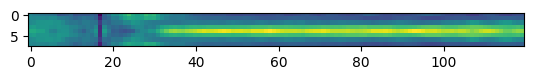

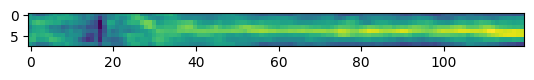

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


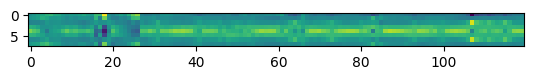

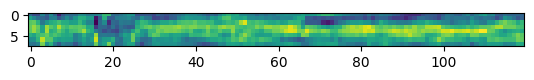

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


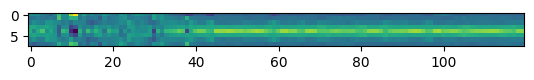

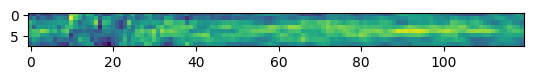

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


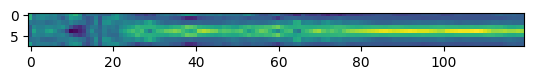

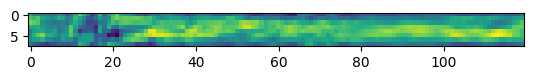

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


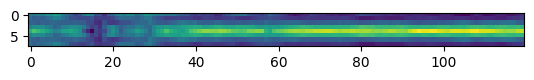

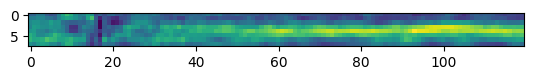

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..
The directory /media/olive/Research/oliver/decoding_revision/slopes/task/V1_90/20 is created!
++ --------------------------------------------------
++ Computing slopes for  ROIV1_90 for the percentage  
++ --------------------------------------------------
++ No. of animals in V1_90 is 10


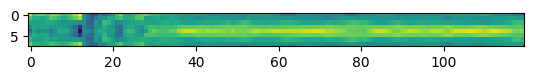

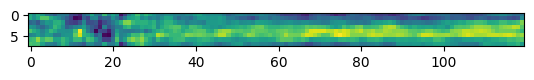

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


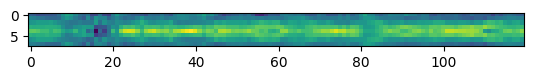

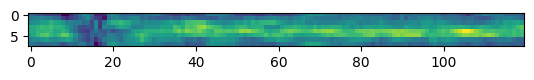

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


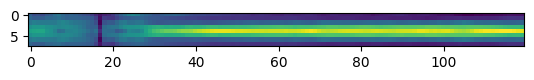

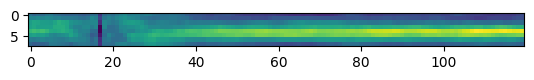

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


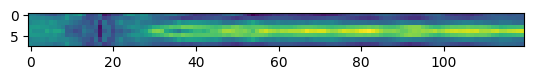

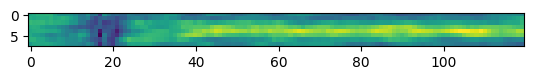

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


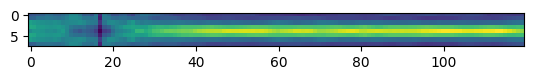

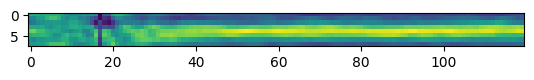

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


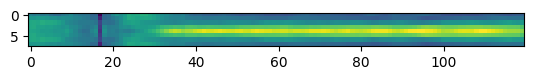

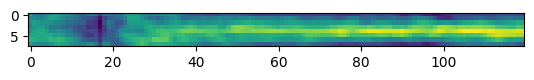

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


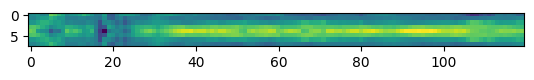

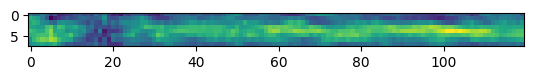

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


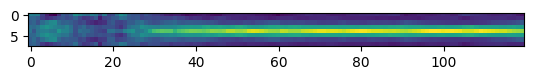

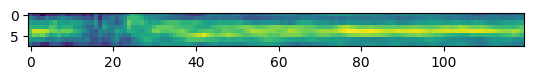

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


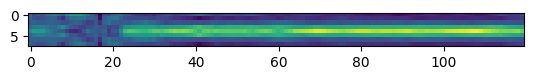

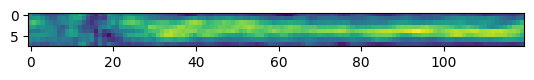

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


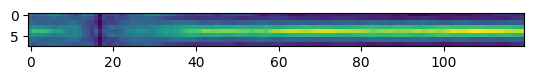

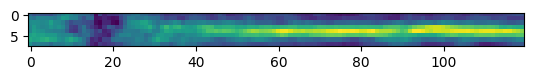

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..
The directory /media/olive/Research/oliver/decoding_revision/slopes/task/V1_90/40 is created!
++ --------------------------------------------------
++ Computing slopes for  ROIV1_90 for the percentage  
++ --------------------------------------------------
++ No. of animals in V1_90 is 10


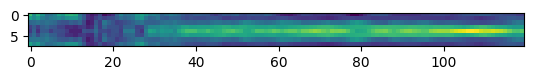

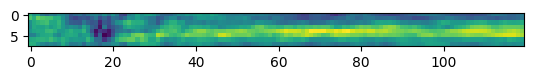

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


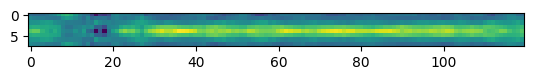

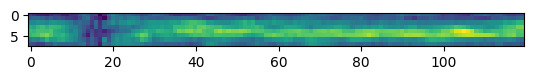

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


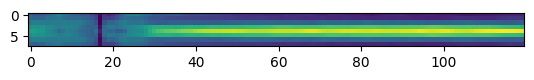

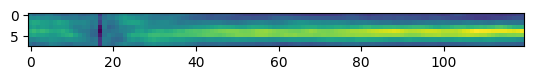

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


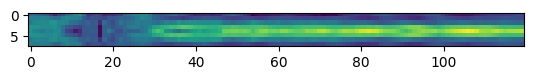

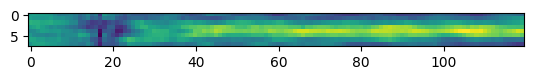

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


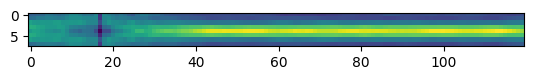

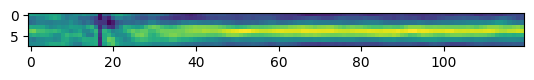

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


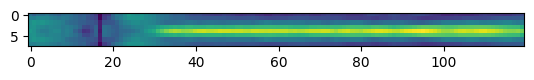

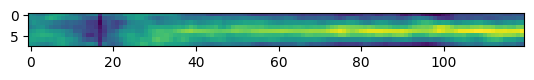

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


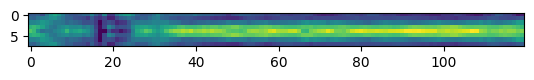

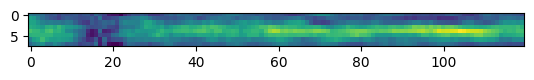

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


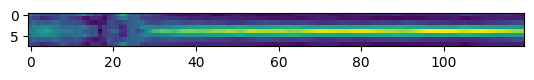

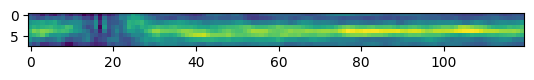

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


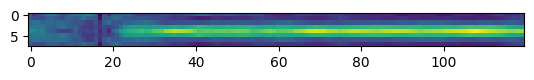

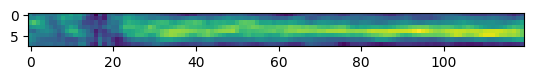

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


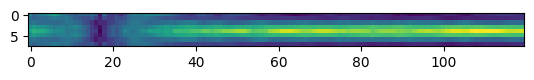

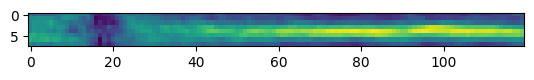

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..
The directory /media/olive/Research/oliver/decoding_revision/slopes/task/V1_90/60 is created!
++ --------------------------------------------------
++ Computing slopes for  ROIV1_90 for the percentage  
++ --------------------------------------------------
++ No. of animals in V1_90 is 10


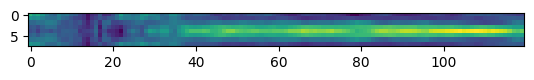

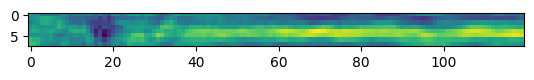

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


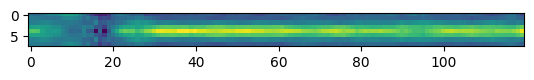

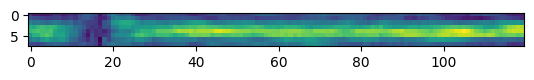

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


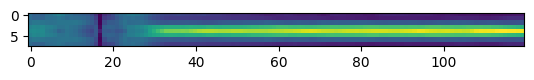

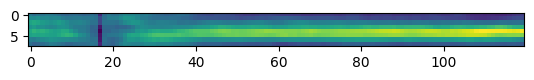

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


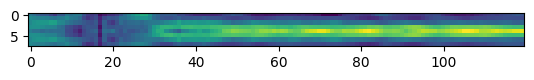

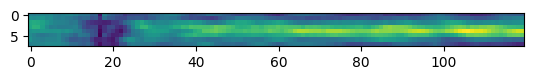

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


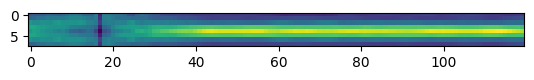

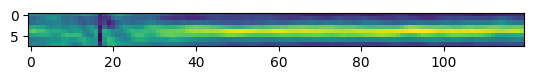

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


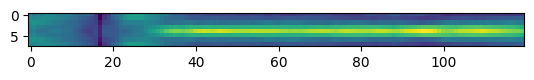

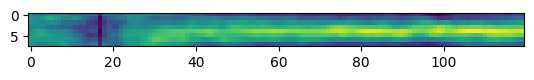

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


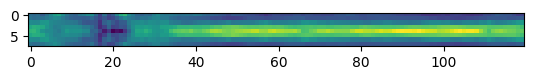

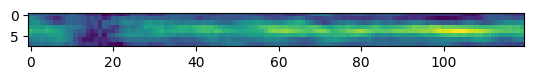

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


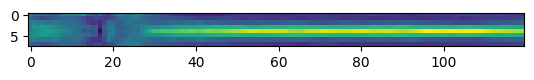

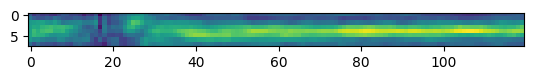

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


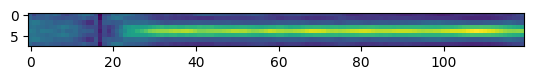

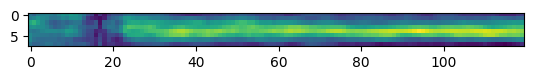

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


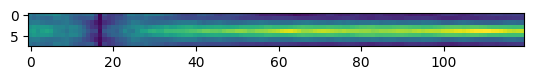

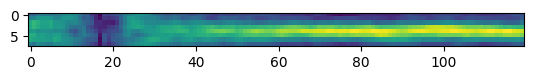

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..
The directory /media/olive/Research/oliver/decoding_revision/slopes/task/V1_90/100 is created!
++ --------------------------------------------------
++ Computing slopes for  ROIV1_135 for the percentage  
++ --------------------------------------------------
++ No. of animals in V1_135 is 10


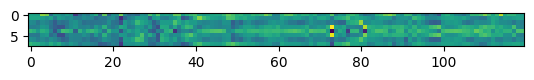

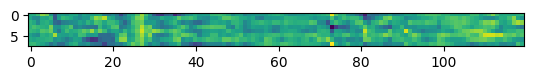

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


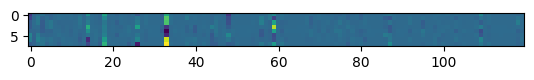

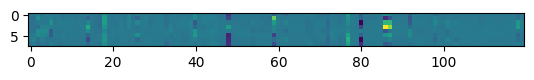

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


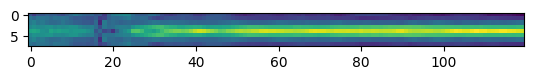

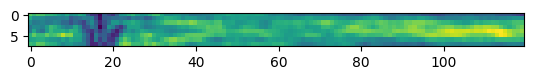

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


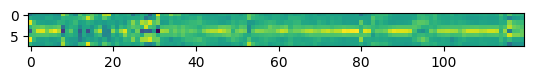

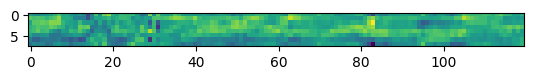

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


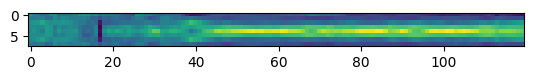

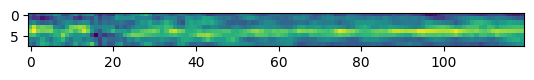

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


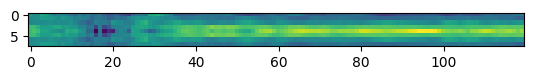

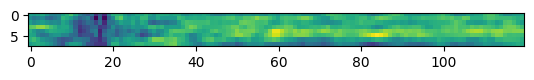

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


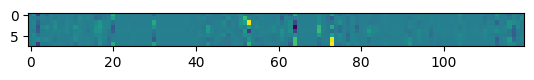

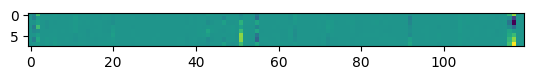

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


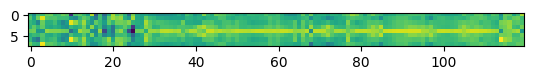

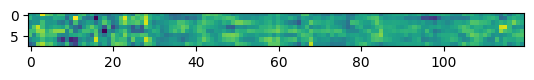

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


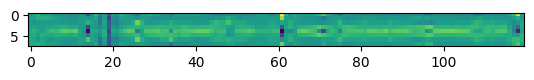

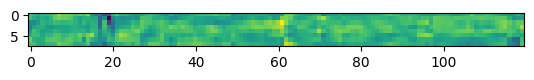

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


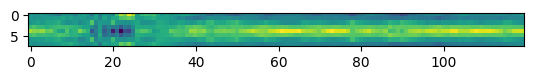

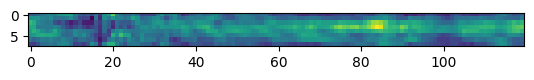

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..
The directory /media/olive/Research/oliver/decoding_revision/slopes/task/V1_135/10 is created!
++ --------------------------------------------------
++ Computing slopes for  ROIV1_135 for the percentage  
++ --------------------------------------------------
++ No. of animals in V1_135 is 10


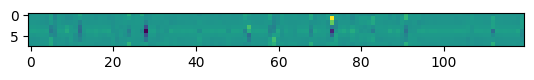

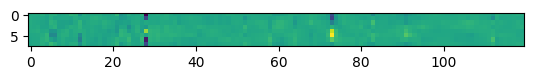

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


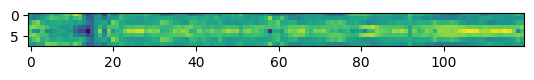

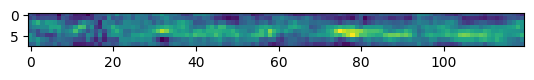

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


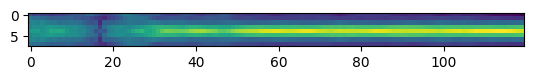

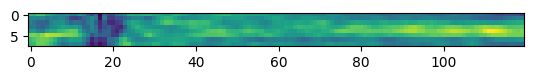

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


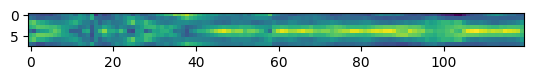

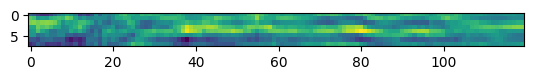

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


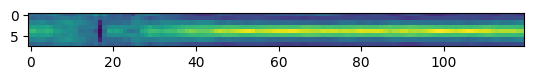

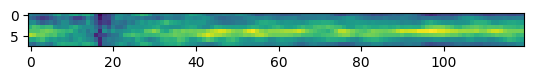

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


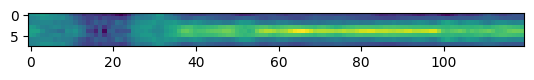

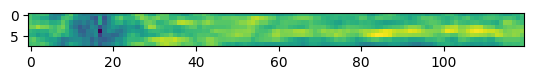

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


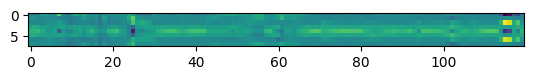

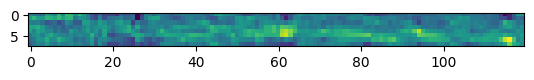

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


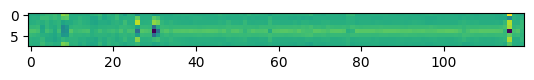

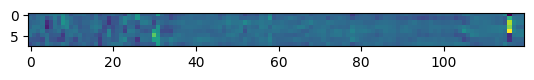

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


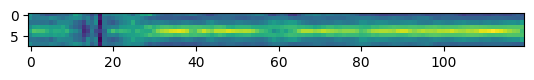

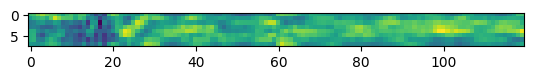

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


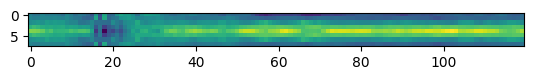

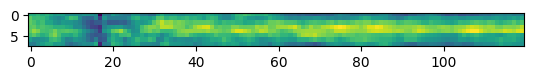

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..
The directory /media/olive/Research/oliver/decoding_revision/slopes/task/V1_135/20 is created!
++ --------------------------------------------------
++ Computing slopes for  ROIV1_135 for the percentage  
++ --------------------------------------------------
++ No. of animals in V1_135 is 10


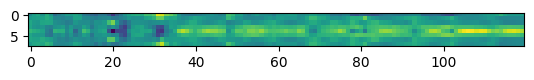

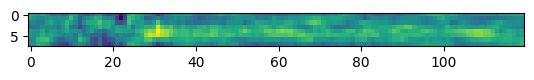

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


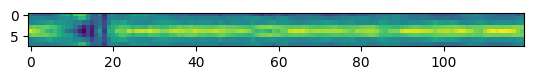

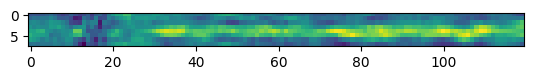

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


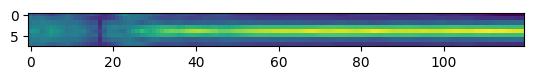

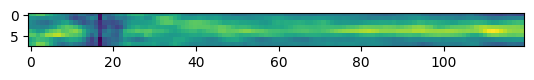

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


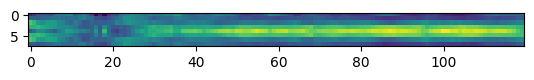

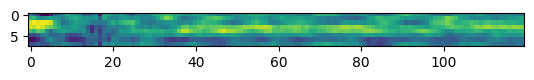

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


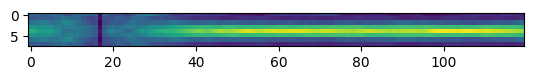

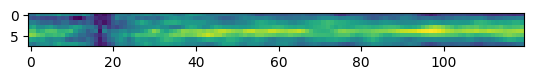

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


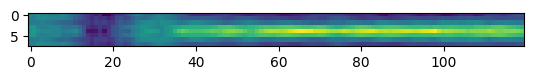

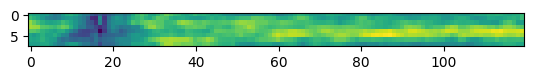

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


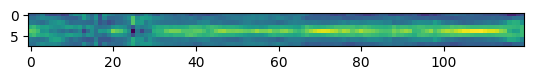

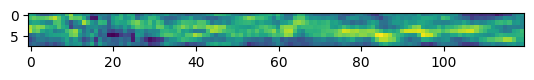

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


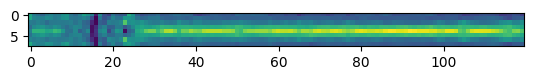

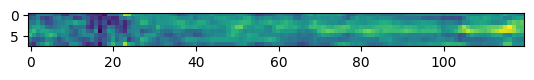

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


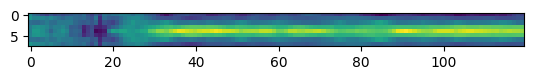

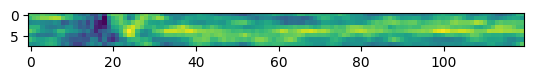

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


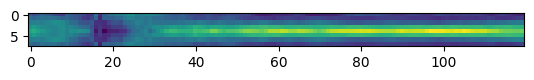

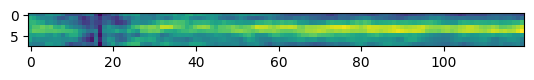

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..
The directory /media/olive/Research/oliver/decoding_revision/slopes/task/V1_135/40 is created!
++ --------------------------------------------------
++ Computing slopes for  ROIV1_135 for the percentage  
++ --------------------------------------------------
++ No. of animals in V1_135 is 10


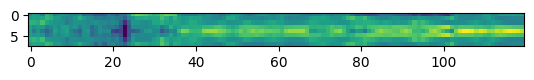

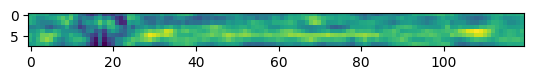

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


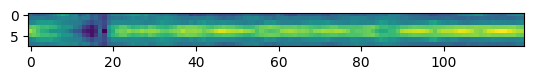

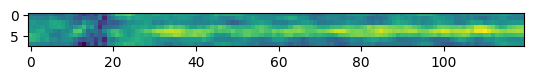

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


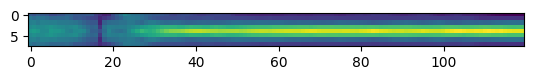

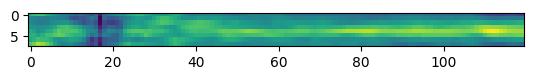

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


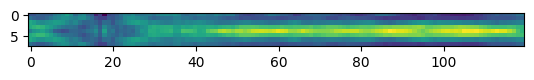

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


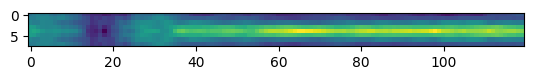

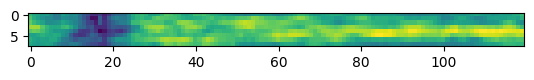

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


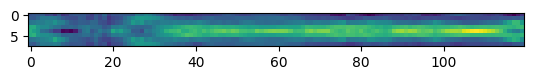

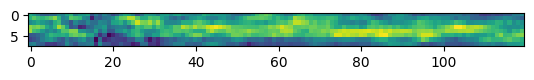

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


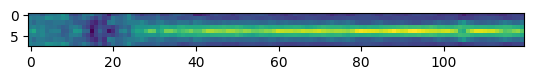

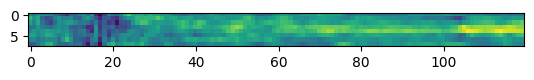

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


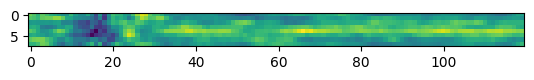

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


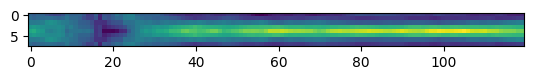

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..
The directory /media/olive/Research/oliver/decoding_revision/slopes/task/V1_135/60 is created!
++ --------------------------------------------------
++ Computing slopes for  ROIV1_135 for the percentage  
++ --------------------------------------------------
++ No. of animals in V1_135 is 10


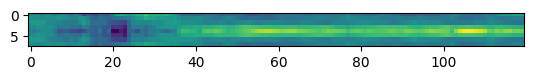

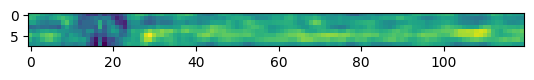

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


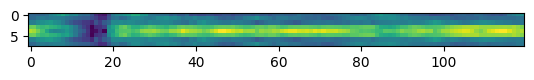

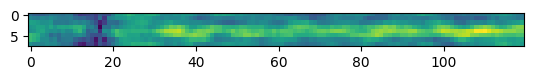

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


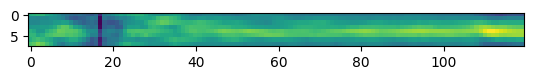

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


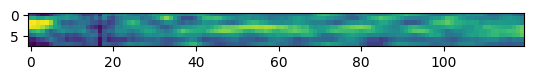

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


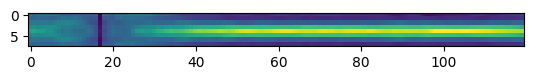

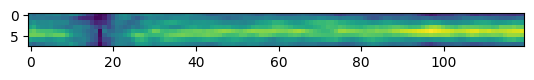

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


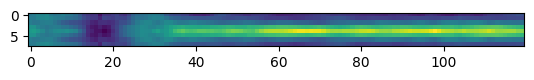

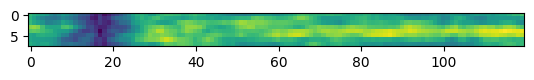

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


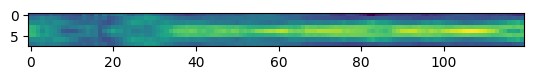

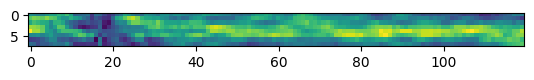

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


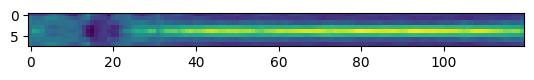

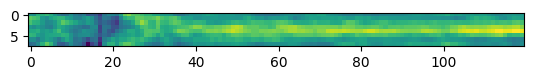

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


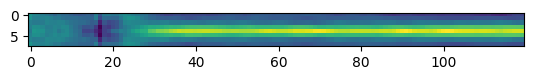

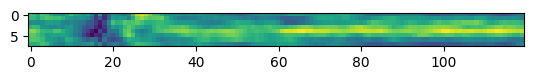

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


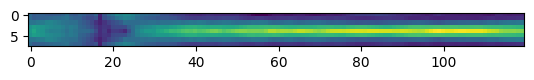

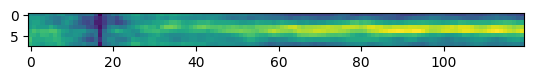

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..
The directory /media/olive/Research/oliver/decoding_revision/slopes/task/V1_135/100 is created!
++ --------------------------------------------------
++ Computing slopes for  ROIPPC_45 for the percentage  
++ --------------------------------------------------
++ No. of animals in PPC_45 is 7


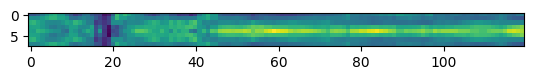

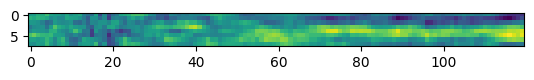

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


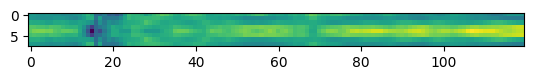

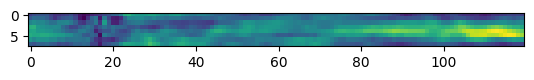

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


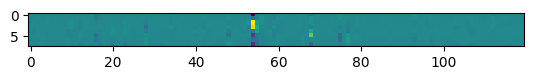

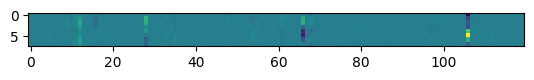

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


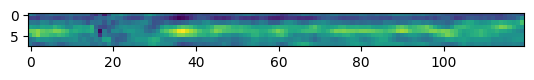

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


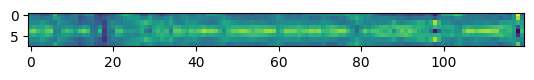

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


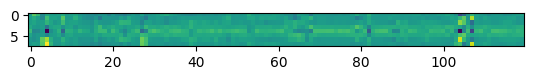

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..
The directory /media/olive/Research/oliver/decoding_revision/slopes/task/PPC_45/10 is created!
++ --------------------------------------------------
++ Computing slopes for  ROIPPC_45 for the percentage  
++ --------------------------------------------------
++ No. of animals in PPC_45 is 7


++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


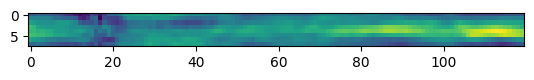

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


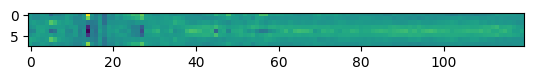

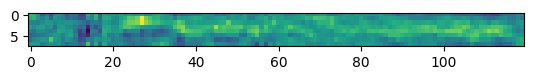

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


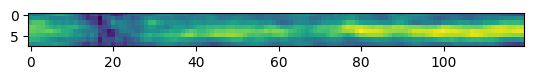

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


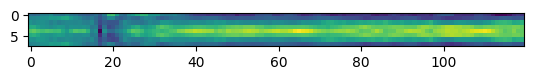

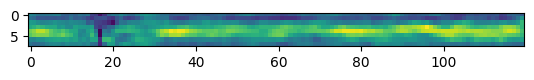

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


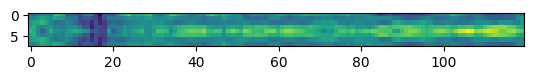

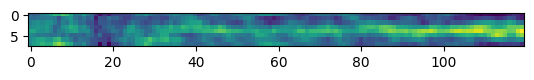

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


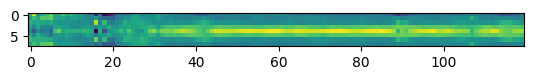

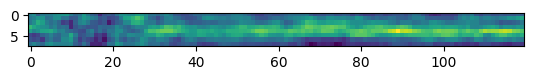

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..
The directory /media/olive/Research/oliver/decoding_revision/slopes/task/PPC_45/20 is created!
++ --------------------------------------------------
++ Computing slopes for  ROIPPC_45 for the percentage  
++ --------------------------------------------------
++ No. of animals in PPC_45 is 7


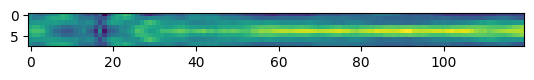

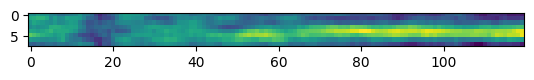

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


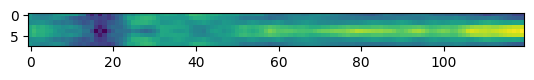

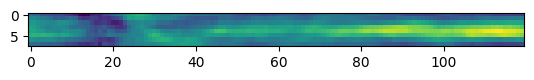

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


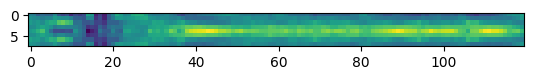

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


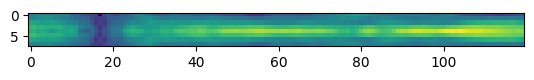

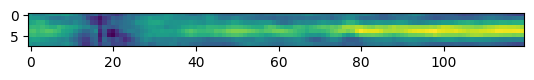

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


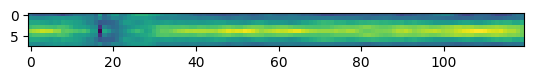

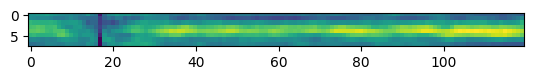

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


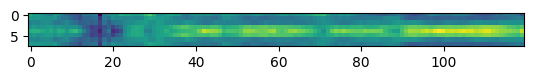

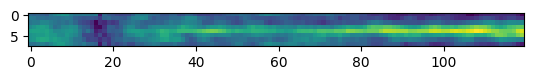

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


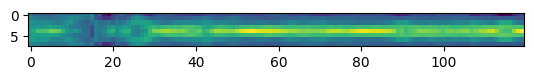

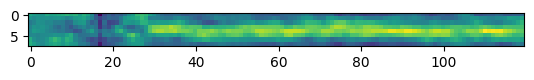

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..
The directory /media/olive/Research/oliver/decoding_revision/slopes/task/PPC_45/40 is created!
++ --------------------------------------------------
++ Computing slopes for  ROIPPC_45 for the percentage  
++ --------------------------------------------------
++ No. of animals in PPC_45 is 7


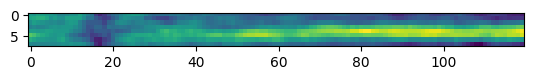

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


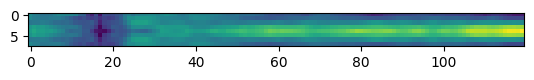

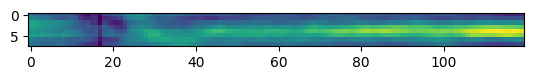

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


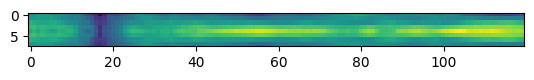

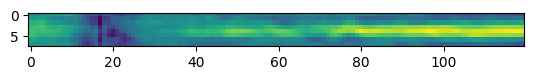

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


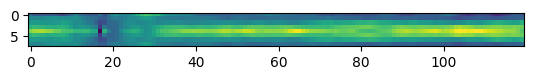

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..
The directory /media/olive/Research/oliver/decoding_revision/slopes/task/PPC_45/60 is created!
++ --------------------------------------------------
++ Computing slopes for  ROIPPC_45 for the percentage  
++ --------------------------------------------------
++ No. of animals in PPC_45 is 7


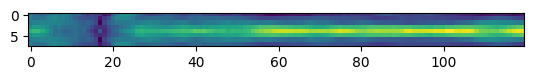

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


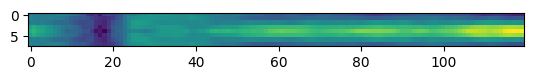

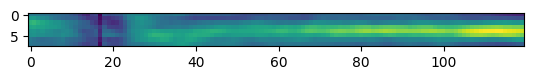

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


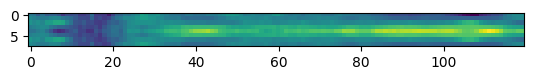

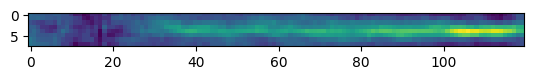

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


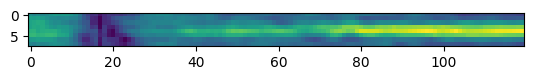

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


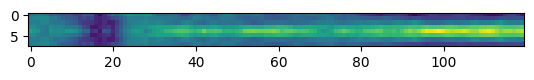

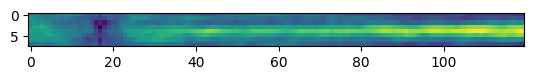

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


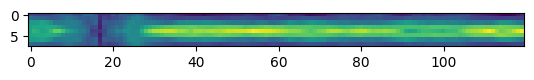

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..
The directory /media/olive/Research/oliver/decoding_revision/slopes/task/PPC_45/100 is created!
++ --------------------------------------------------
++ Computing slopes for  ROIPPC_90 for the percentage  
++ --------------------------------------------------
++ No. of animals in PPC_90 is 7


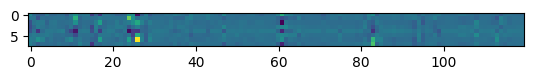

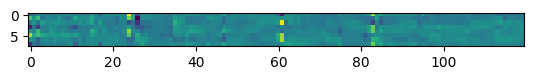

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


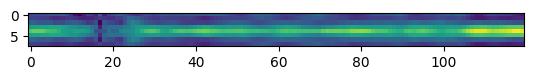

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


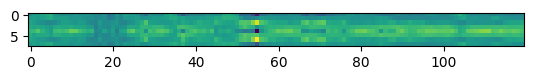

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


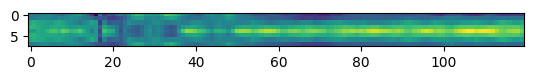

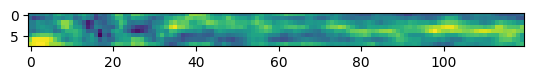

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


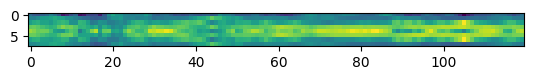

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


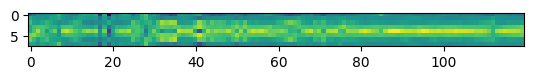

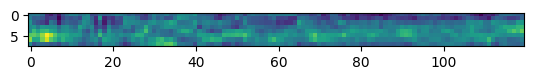

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


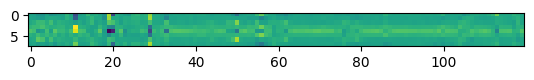

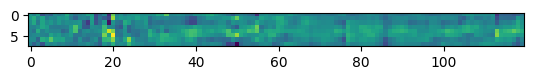

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..
The directory /media/olive/Research/oliver/decoding_revision/slopes/task/PPC_90/10 is created!
++ --------------------------------------------------
++ Computing slopes for  ROIPPC_90 for the percentage  
++ --------------------------------------------------
++ No. of animals in PPC_90 is 7


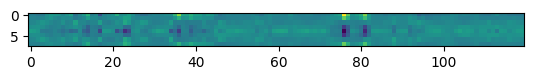

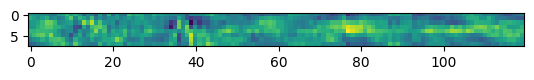

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


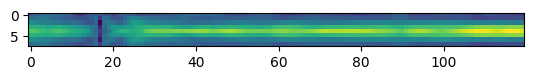

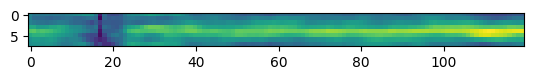

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


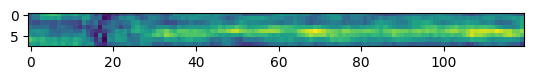

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


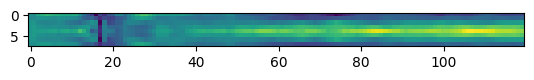

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


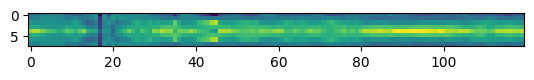

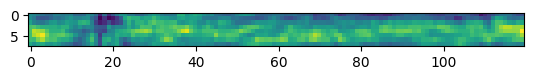

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


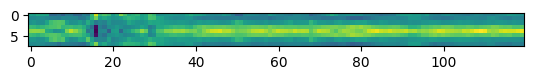

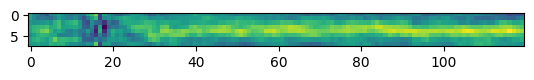

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..
The directory /media/olive/Research/oliver/decoding_revision/slopes/task/PPC_90/20 is created!
++ --------------------------------------------------
++ Computing slopes for  ROIPPC_90 for the percentage  
++ --------------------------------------------------
++ No. of animals in PPC_90 is 7


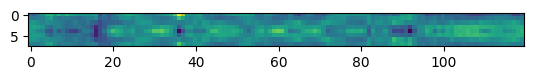

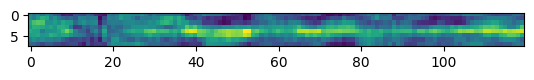

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


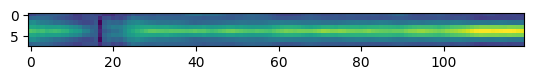

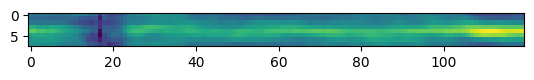

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


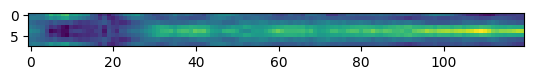

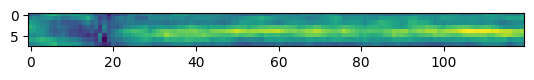

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


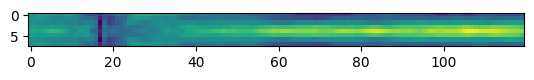

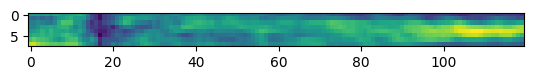

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


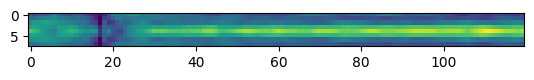

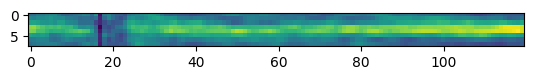

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


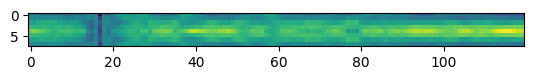

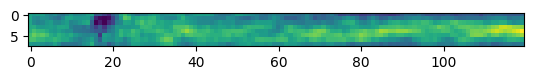

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


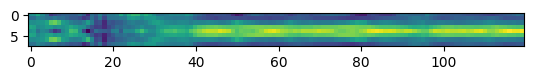

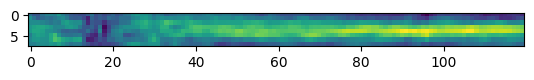

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..
The directory /media/olive/Research/oliver/decoding_revision/slopes/task/PPC_90/40 is created!
++ --------------------------------------------------
++ Computing slopes for  ROIPPC_90 for the percentage  
++ --------------------------------------------------
++ No. of animals in PPC_90 is 7


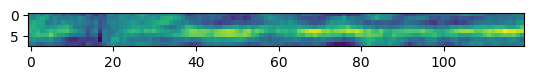

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


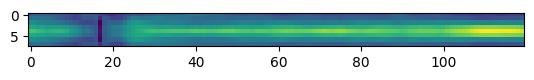

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


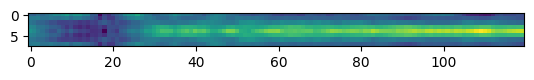

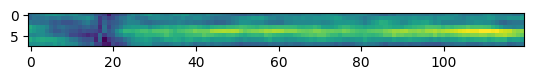

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


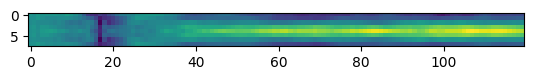

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


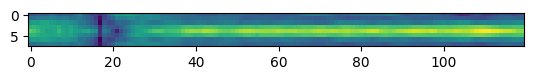

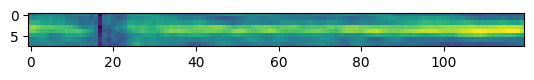

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


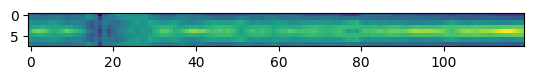

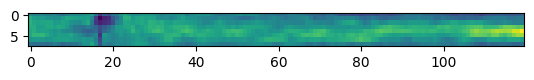

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


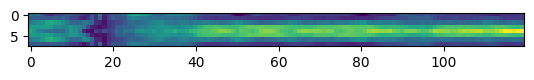

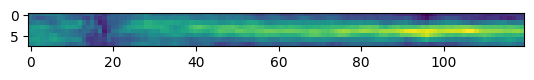

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..
The directory /media/olive/Research/oliver/decoding_revision/slopes/task/PPC_90/60 is created!
++ --------------------------------------------------
++ Computing slopes for  ROIPPC_90 for the percentage  
++ --------------------------------------------------
++ No. of animals in PPC_90 is 7


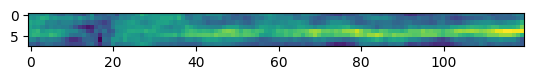

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


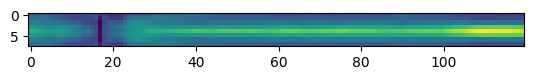

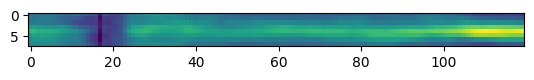

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


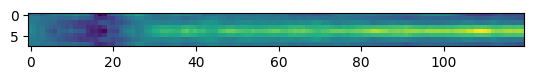

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


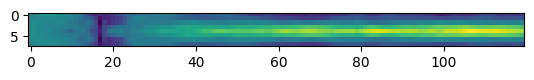

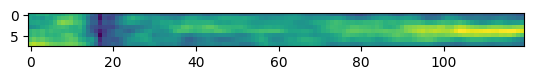

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


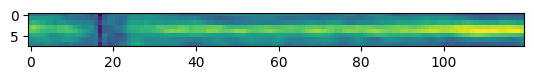

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


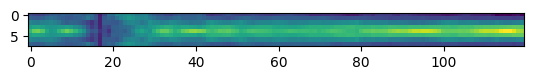

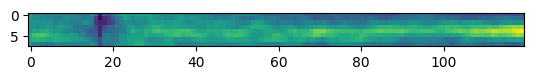

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


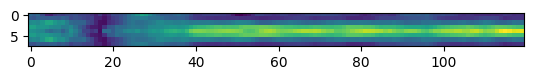

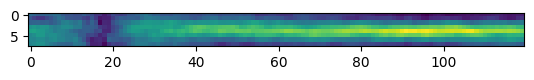

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..
The directory /media/olive/Research/oliver/decoding_revision/slopes/task/PPC_90/100 is created!
++ --------------------------------------------------
++ Computing slopes for  ROIPPC_135 for the percentage  
++ --------------------------------------------------
++ No. of animals in PPC_135 is 7


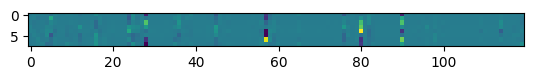

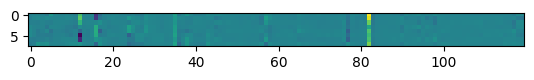

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


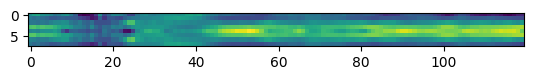

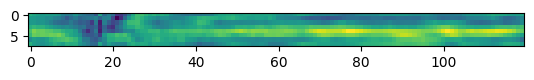

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


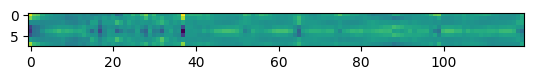

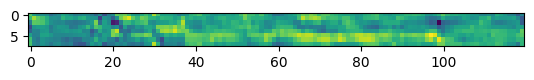

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


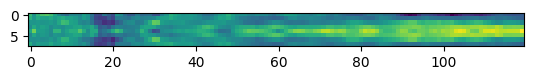

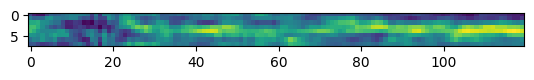

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


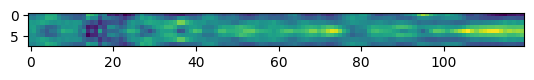

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


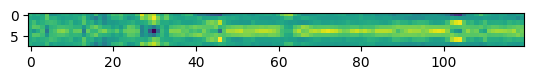

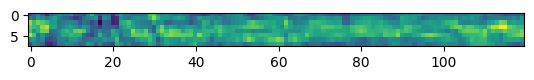

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


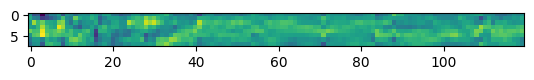

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..
The directory /media/olive/Research/oliver/decoding_revision/slopes/task/PPC_135/10 is created!
++ --------------------------------------------------
++ Computing slopes for  ROIPPC_135 for the percentage  
++ --------------------------------------------------
++ No. of animals in PPC_135 is 7


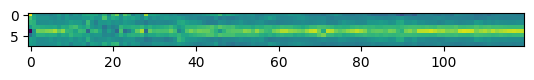

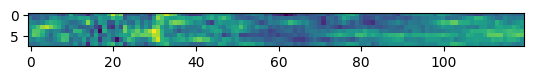

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


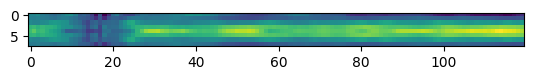

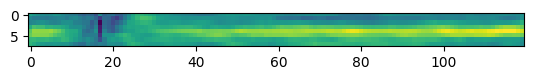

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


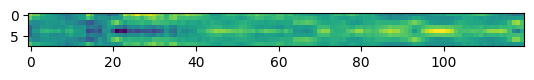

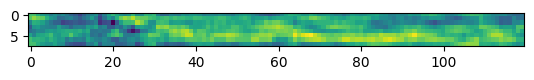

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


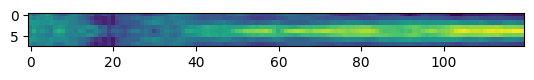

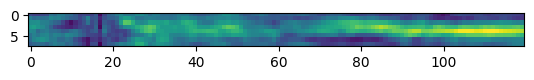

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


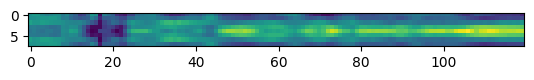

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


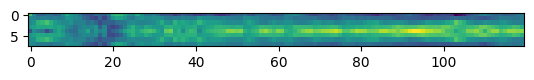

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


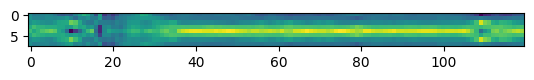

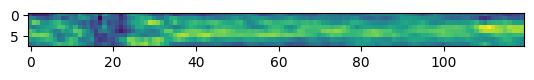

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..
The directory /media/olive/Research/oliver/decoding_revision/slopes/task/PPC_135/20 is created!
++ --------------------------------------------------
++ Computing slopes for  ROIPPC_135 for the percentage  
++ --------------------------------------------------
++ No. of animals in PPC_135 is 7


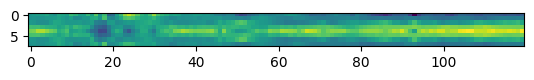

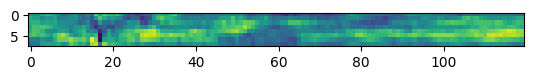

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


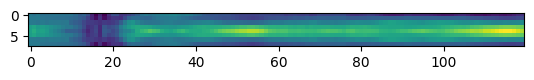

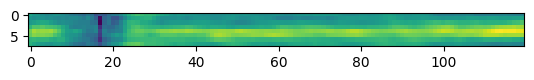

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


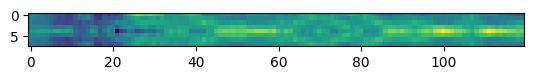

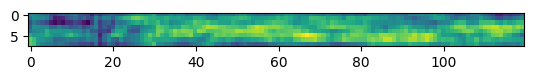

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


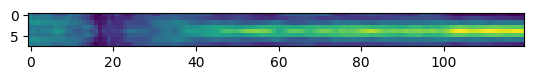

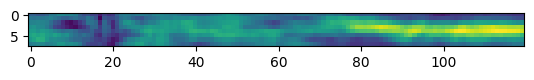

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


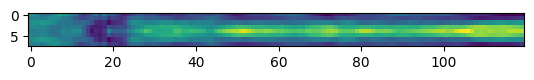

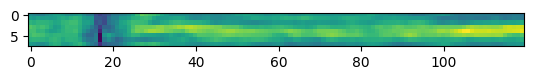

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


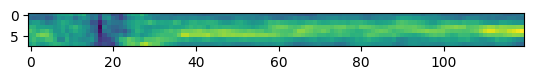

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..
The directory /media/olive/Research/oliver/decoding_revision/slopes/task/PPC_135/40 is created!
++ --------------------------------------------------
++ Computing slopes for  ROIPPC_135 for the percentage  
++ --------------------------------------------------
++ No. of animals in PPC_135 is 7


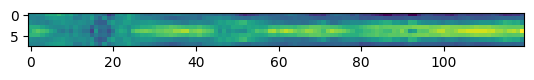

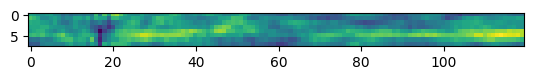

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


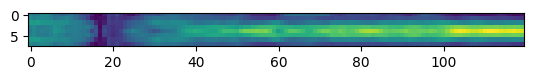

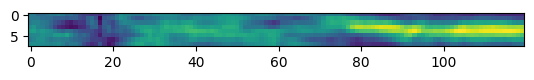

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


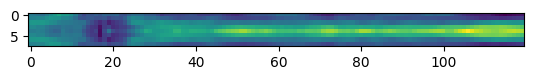

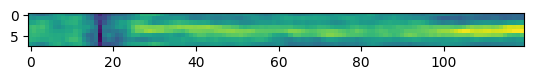

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


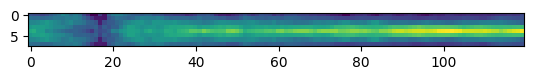

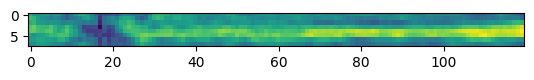

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


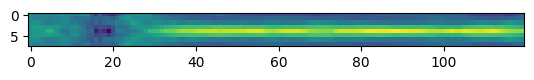

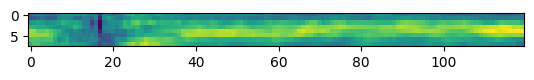

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..
The directory /media/olive/Research/oliver/decoding_revision/slopes/task/PPC_135/60 is created!
++ --------------------------------------------------
++ Computing slopes for  ROIPPC_135 for the percentage  
++ --------------------------------------------------
++ No. of animals in PPC_135 is 7


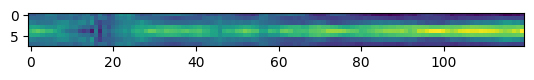

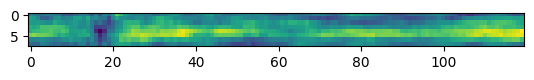

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


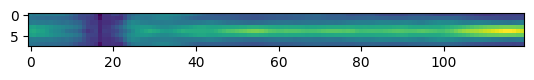

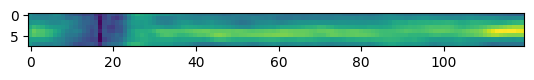

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


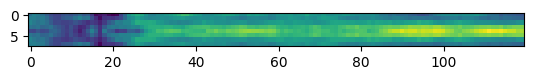

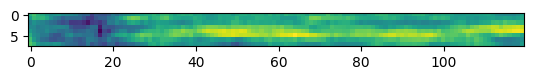

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


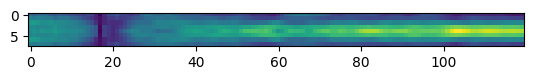

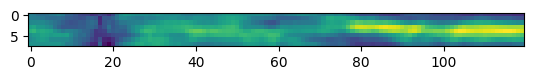

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


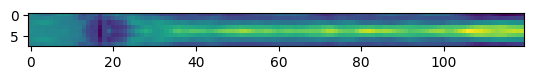

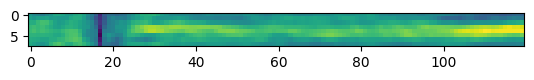

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


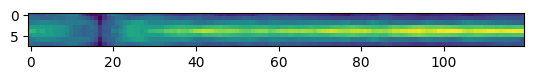

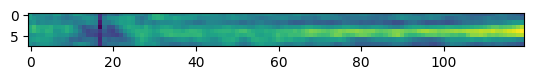

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..


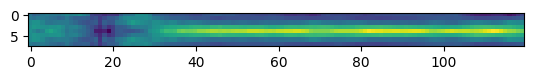

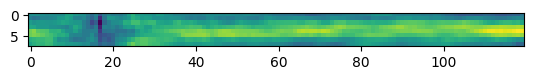

++ Averaging equi-distant orientations
++ NO Gaussian smoothening desired!
++ Computing slopes..
The directory /media/olive/Research/oliver/decoding_revision/slopes/task/PPC_135/100 is created!


In [55]:
nt=120   # 120 time-points for 20 Hz

 
for roi in ROIs_hetero:   # For each heterogeneous condition 
    
    for pp in percent_data:
        os.chdir(task_tc_path)
        print_status('Computing slopes for  ROI' + roi +' for the percentage  ',str(pp)) 
    
        os.chdir(os.path.join(roi,str(pp)))

        ani_list=os.listdir()
        noa=len(ani_list)

        print_status('No. of animals in ' + roi + ' is ' + str(noa))

        st_roi = time.time()

        slopes=np.zeros((noa,nt,2))

        for p in range(len(ani_list)):   # For each animal
        #for p in range(1):

            A=np.load(ani_list[p])  # Load the tuning curve data 
            
            plt.imshow(A[:,:,0]) 
            plt.show()

            plt.imshow(A[:,:,1]) 
            plt.show()
            
            B=avg_across_zero_centered_tcs(A,shift=wrap_around)

            if Gaussian_smoothening_needed:
                print_status('Gaussian smoothening desired!') 
                S=Gaussian_smoothener(B,sig=sig,trun=trun ,ts=ts) 
            else:
                print_status('NO Gaussian smoothening desired!') 
                S=B  

            ## Estimate the slope 
            # Homo-case
            print_status('Computing slopes..') 
            for time_pts in range(nt): 
                slopes[p,time_pts,0]=esti_slope(slope_angles,S[:,time_pts,0],intercept=True, standardise=False) 

            # Hetero-case 
            for time_pts in range(nt): 
                slopes[p,time_pts,1]=esti_slope(slope_angles,S[:,time_pts,1],intercept=True, standardise=False)  


        save_dir=os.path.join(slopes_data_path,'task',roi,str(pp))
        create_dir(save_dir)
        
        fname=os.path.join(save_dir,'slopes.npy')
        np.save(fname,slopes) 

In [44]:
A.shape

(8, 120, 2)

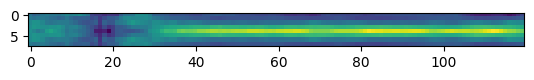

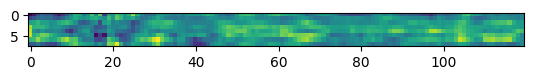

In [46]:
plt.imshow(A[:,:,0]) 
plt.show()

plt.imshow(A[:,:,1]) 
plt.show()


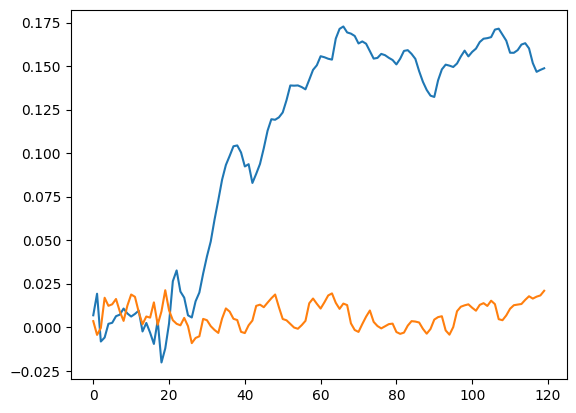

In [25]:
# test plot

A=np.load('/media/olive/Research/oliver/decoding_revision/slopes/task/V1_45/100/slopes.npy')
A.shape

plt.plot(A[5,:,0])
plt.plot(A[5,:,1])
plt.show()


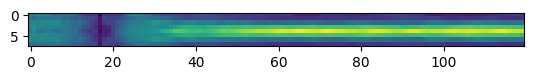

In [36]:
A=np.load('/media/olive/Research/oliver/decoding_revision/tuning_curves/task/V1_45/100/Mouse6.npy')
A.shape

plt.imshow(A[:,:,0]) 
plt.show()

plt.imshow(A[:,:,1])
plt.show()

## For passive conditions